# MNIST in NumPy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the Dataset

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f'Shape of df_train: {df_train.shape}')
print(f'Shape of df_test: {df_test.shape}')

Shape of df_train: (60000, 785)
Shape of df_test: (10000, 785)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


#### Creating Training and Testing data

In [6]:
X_train, y_train = np.array(df_train.drop(columns=['label'])), np.array(df_train['label'])
X_test, y_test = np.array(df_test.drop(columns=['label'])), np.array(df_test['label'])

In [7]:
print(f'Shape of X_train: {X_train.shape}\tShape of y_train: {y_train.shape}')
print(f'Shape of X_test:  {X_test.shape}\tShape of y_test:  {y_test.shape}')

Shape of X_train: (60000, 784)	Shape of y_train: (60000,)
Shape of X_test:  (10000, 784)	Shape of y_test:  (10000,)


#### View some numbers

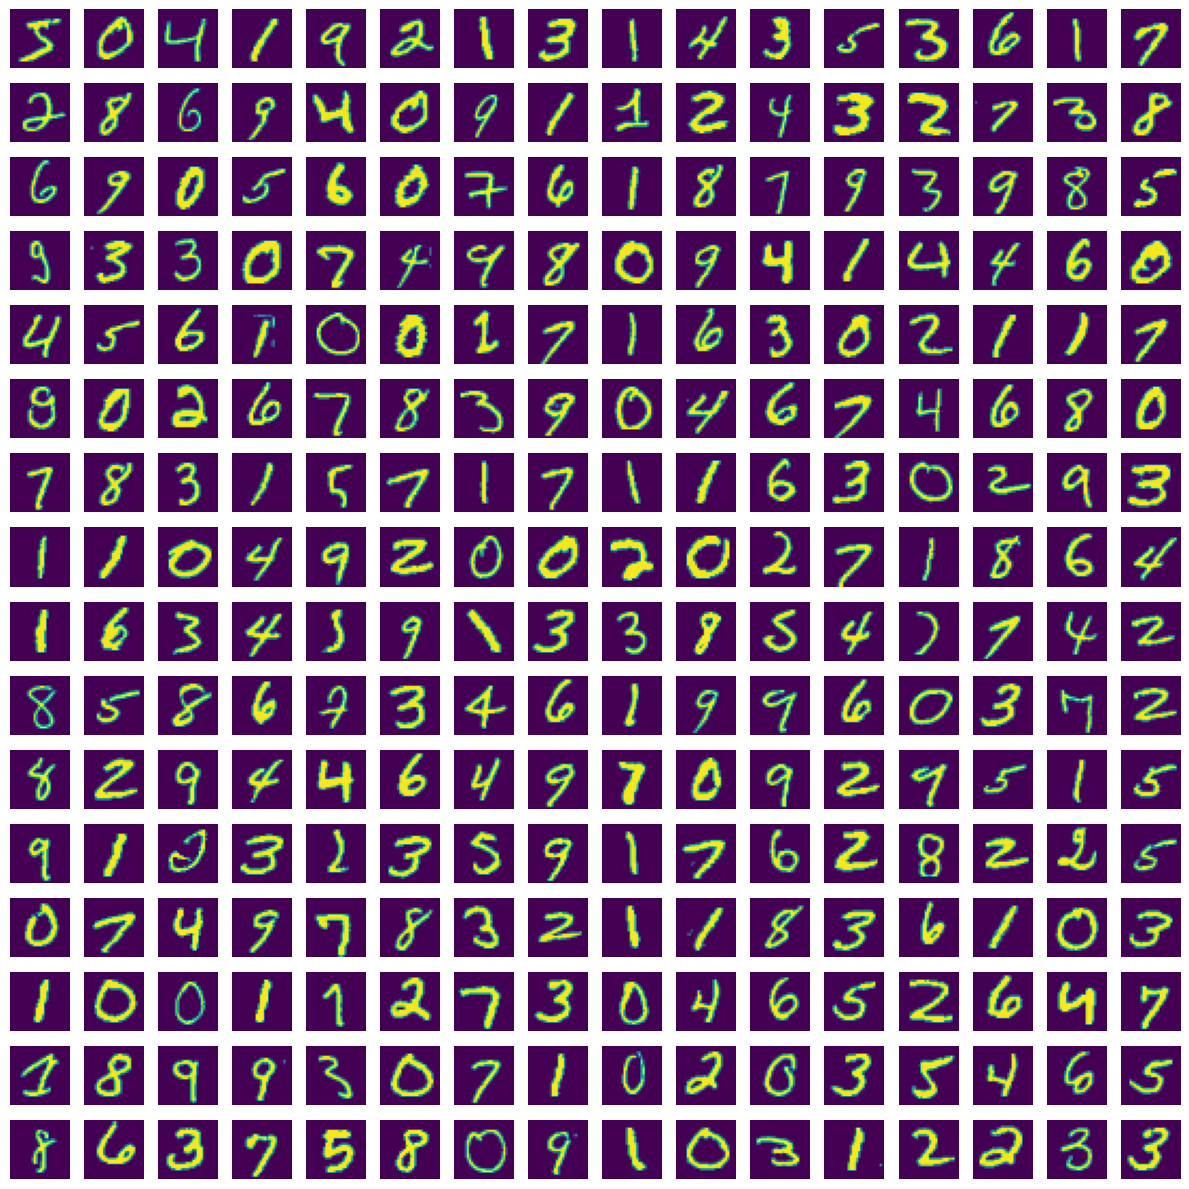

In [8]:
N = 16
fig, axes = plt.subplots(nrows=N, ncols=N, figsize=(12, 12))
for i in range(N**2):
    ax = axes[i // N, i % N]
    ax.imshow(X_train[i].reshape(28, 28))
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Using PyTorch

In [9]:
import torch
from mnist_torch import BobNetTorch

In [10]:
X_train_torch, y_train_torch = torch.Tensor(X_train), torch.Tensor(y_train)
X_test_torch, y_test_torch = torch.Tensor(X_test), torch.Tensor(y_test)
print(f'Shape of X_train: {X_train_torch.shape}')
print(f'Shape of y_train: {y_train_torch.shape}')
print(f'Shape of X_test: {X_test_torch.shape}')
print(f'Shape of y_test: {y_test_torch.shape}')

Shape of X_train: torch.Size([60000, 784])
Shape of y_train: torch.Size([60000])
Shape of X_test: torch.Size([10000, 784])
Shape of y_test: torch.Size([10000])


In [11]:
# Create the neural network, train and predict
bobnet = BobNetTorch(n_in=784, n_hidden=512, n_out=10)
bobnet.fit(X_train_torch, y_train_torch, lr=0.01, epochs=200)

Epoch: 0	Loss: 24.33	Accuracy: 0.1121
Epoch: 10	Loss: 1.56	Accuracy: 0.4737
Epoch: 20	Loss: 1.15	Accuracy: 0.6191
Epoch: 30	Loss: 0.77	Accuracy: 0.7517
Epoch: 40	Loss: 0.49	Accuracy: 0.8508
Epoch: 50	Loss: 0.42	Accuracy: 0.8724
Epoch: 60	Loss: 0.33	Accuracy: 0.9003
Epoch: 70	Loss: 0.32	Accuracy: 0.9038
Epoch: 80	Loss: 0.28	Accuracy: 0.9169
Epoch: 90	Loss: 0.25	Accuracy: 0.9247
Epoch: 100	Loss: 0.29	Accuracy: 0.9098
Epoch: 110	Loss: 0.23	Accuracy: 0.9323
Epoch: 120	Loss: 0.22	Accuracy: 0.9347
Epoch: 130	Loss: 0.29	Accuracy: 0.9079
Epoch: 140	Loss: 0.20	Accuracy: 0.9400
Epoch: 150	Loss: 0.19	Accuracy: 0.9425
Epoch: 160	Loss: 0.18	Accuracy: 0.9444
Epoch: 170	Loss: 0.18	Accuracy: 0.9456
Epoch: 180	Loss: 0.18	Accuracy: 0.9455
Epoch: 190	Loss: 0.21	Accuracy: 0.9324


In [12]:
note = """
I use SGD here.

Here are the results using Adam optimizer with lr = 0.001:
Epoch: 0	Loss: 31.40	Accuracy: 0.0635
Epoch: 10	Loss: 4.52	Accuracy: 0.7986
Epoch: 20	Loss: 1.92	Accuracy: 0.8837
Epoch: 30	Loss: 0.99	Accuracy: 0.9108
Epoch: 40	Loss: 0.68	Accuracy: 0.9234
Epoch: 50	Loss: 0.49	Accuracy: 0.9323
Epoch: 60	Loss: 0.38	Accuracy: 0.9388
Epoch: 70	Loss: 0.30	Accuracy: 0.9455
Epoch: 80	Loss: 0.25	Accuracy: 0.9505
Epoch: 90	Loss: 0.21	Accuracy: 0.9556
Epoch: 100	Loss: 0.18	Accuracy: 0.9598
Epoch: 110	Loss: 0.16	Accuracy: 0.9635
Epoch: 120	Loss: 0.14	Accuracy: 0.9673
Epoch: 130	Loss: 0.12	Accuracy: 0.9707
Epoch: 140	Loss: 0.11	Accuracy: 0.9736
Epoch: 150	Loss: 0.10	Accuracy: 0.9764
Epoch: 160	Loss: 0.09	Accuracy: 0.9787
Epoch: 170	Loss: 0.08	Accuracy: 0.9806
Epoch: 180	Loss: 0.07	Accuracy: 0.9826
Epoch: 190	Loss: 0.06	Accuracy: 0.9845
"""

In [13]:
# Calculate accuracy on testing data
y_hat_torch = bobnet.predict(X_test_torch)
preds = torch.argmax(y_hat_torch, dim=1)
accuracy = (preds == y_test_torch).float().mean()
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94
